# Scrape transitfeeds.com to download data

In [2]:
# Data is stored in ./files/zip_files/ which is then extracted into ./files/extracted/
from utils.files_downloader import download_data
download_data("p/mta/79")

Total number of pages: 6
20221129.zip already exists.
20221129 folder already exists.
20221121.zip already exists.
20221121 folder already exists.
20220615.zip already exists.
20220615 folder already exists.
20211210.zip already exists.
20211210 folder already exists.
20211109.zip already exists.
20211109 folder already exists.
20210713.zip already exists.
20210713 folder already exists.
20210615.zip already exists.
20210615 folder already exists.
20210503.zip already exists.
20210503 folder already exists.
20210315.zip already exists.
20210315 folder already exists.
20201102.zip already exists.
20201102 folder already exists.
20201001.zip already exists.
20201001 folder already exists.
20200910.zip already exists.
20200910 folder already exists.
20200814.zip already exists.
20200814 folder already exists.
20200430.zip already exists.
20200430 folder already exists.
20200109.zip already exists.
20200109 folder already exists.
20191231.zip already exists.
20191231 folder already exists.

# Generate index mapping tables


In [3]:
# Reads files from ./files/extracted/*
# Generates ./mappings/all_dates_service_schedule.csv which maps dates-to-services, for every day
# The code goes through every single date as to ensure that no gtfs feed data is overlooked
from utils.map_files_to_service import files_to_service_schedule
files_to_service_schedule()

{'service_id': 'A20131215SUN', 'date': 20131225, 'exception_type': 1}
{'service_id': 'A20131215SUN', 'date': 20140101, 'exception_type': 1}
{'service_id': 'A20131215SAT', 'date': 20140217, 'exception_type': 1}
{'service_id': 'A20131215SUN', 'date': 20140526, 'exception_type': 1}
{'service_id': 'B20131215SUN', 'date': 20131225, 'exception_type': 1}
{'service_id': 'B20131215SUN', 'date': 20140101, 'exception_type': 1}
{'service_id': 'B20131215SAT', 'date': 20140217, 'exception_type': 1}
{'service_id': 'B20131215SUN', 'date': 20140526, 'exception_type': 1}
{'service_id': 'A20140608SAT', 'date': 20140704, 'exception_type': 1}
{'service_id': 'A20140608SUN', 'date': 20140901, 'exception_type': 1}
{'service_id': 'A20140608SUN', 'date': 20141127, 'exception_type': 1}
{'service_id': 'B20140608SAT', 'date': 20140704, 'exception_type': 1}
{'service_id': 'B20140608SUN', 'date': 20140901, 'exception_type': 1}
{'service_id': 'B20140608SUN', 'date': 20141127, 'exception_type': 1}
{'service_id': 'B201

In [4]:
# Reads from ./files/extracted/*
# Generates ./mappings/services_to_trips.csv which maps services-to-trips
from utils.map_services_to_trips import services_to_trips
services_to_trips()

In [5]:
# Reads from ./files/extracted/*
# Generates ./mappings/stops_to_stations.csv and ./mappings/stations_to_stops.csv to allow for bidirectional indexing

# This consolidates stops into stations that can be used as the base unit for graph analysis
# This is because different lines may use different tracks (or stops) but still share the same station at a location
from utils.map_stops_to_stations import stops_to_stations
stops_to_stations()

(35532, 4)
(0, 4)


In [6]:
# Reads from ./files/extracted/*
# Also reads from ./mappings/services_to_trips.csv and ./mappings/stops_to_stations.csv
# Generates trips_to_station_nodes_edges.csv which maps trips-to-stations by graph theory layout
from utils.map_trips_to_stations import trips_to_stations
trips_to_stations()

In [7]:
# Reads from ./files/extracted/*
# Also reads from ./mappings/stations_to_stops.csv
# Generates ./mappings/stations_to_coordinates.csv which attributes x y coordinates to stations

# This provides me with x y coordinates to use in networkx visualization
from utils.map_stations_to_coordinates import stations_to_coordinates
stations_to_coordinates()

# Process data

In [9]:
# Reads from ./mappings/all_dates_services_schedule.csv, ./mappings/services_to_trips.csv,
#        and ./mappings/trips_to_station_nodes_edges.csv
# Generates ./results/daily_files/{date}.csv for every date

# Mapping data is used to generate daily csv file with node, edge, and weight variables
from utils.process_trips_to_daily_graph import trips_to_daily_nodes_edges
trips_to_daily_nodes_edges()

c:\Users\cjong\Projects\python\gtfs_test_2\gtfs_to_nodes_and_edges\utils\process_trips_to_daily_graph.py:27: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  trips_to_station_graph_file_df = pd.read_csv(mappings_path + 'trips_to_station_nodes_edges.csv')


results/daily_files/20130803.csv already exists
results/daily_files/20130804.csv already exists
results/daily_files/20130805.csv already exists
results/daily_files/20130806.csv already exists
results/daily_files/20130807.csv already exists
results/daily_files/20130808.csv already exists
results/daily_files/20130809.csv already exists
results/daily_files/20130810.csv already exists
results/daily_files/20130811.csv already exists
results/daily_files/20130812.csv already exists
results/daily_files/20130813.csv already exists
results/daily_files/20130814.csv already exists
results/daily_files/20130815.csv already exists
results/daily_files/20130816.csv already exists
results/daily_files/20130817.csv already exists
results/daily_files/20130818.csv already exists
results/daily_files/20130819.csv already exists
results/daily_files/20130820.csv already exists
results/daily_files/20130821.csv already exists
results/daily_files/20130822.csv already exists
results/daily_files/20130823.csv already

In [11]:
# Aggregation of total stops made across MTA given a timerange
# Reads from ./mappings/all_dates_services_schedule.csv, ./mappings/services_to_trips.csv,
#        and ./mappings/trips_to_station_nodes_edges.csv
# Also reads from ./results/daily_files/{date}.csv for every date
# Generates ./results/queried_dates/{SEARCH_START_DATE}-{SEARCH_END_DATE}-aggregated_nodes_edges.csv
from utils.process_queried_range import aggregate_from_daterange
aggregate_from_daterange(2019, 1, 1,
                         2019, 12, 31)

c:\Users\cjong\Projects\python\gtfs_test_2\gtfs_to_nodes_and_edges\utils\process_queried_range.py:43: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  trips_to_station_graph_file_df = pd.read_csv(mappings_path + 'trips_to_station_nodes_edges.csv')


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


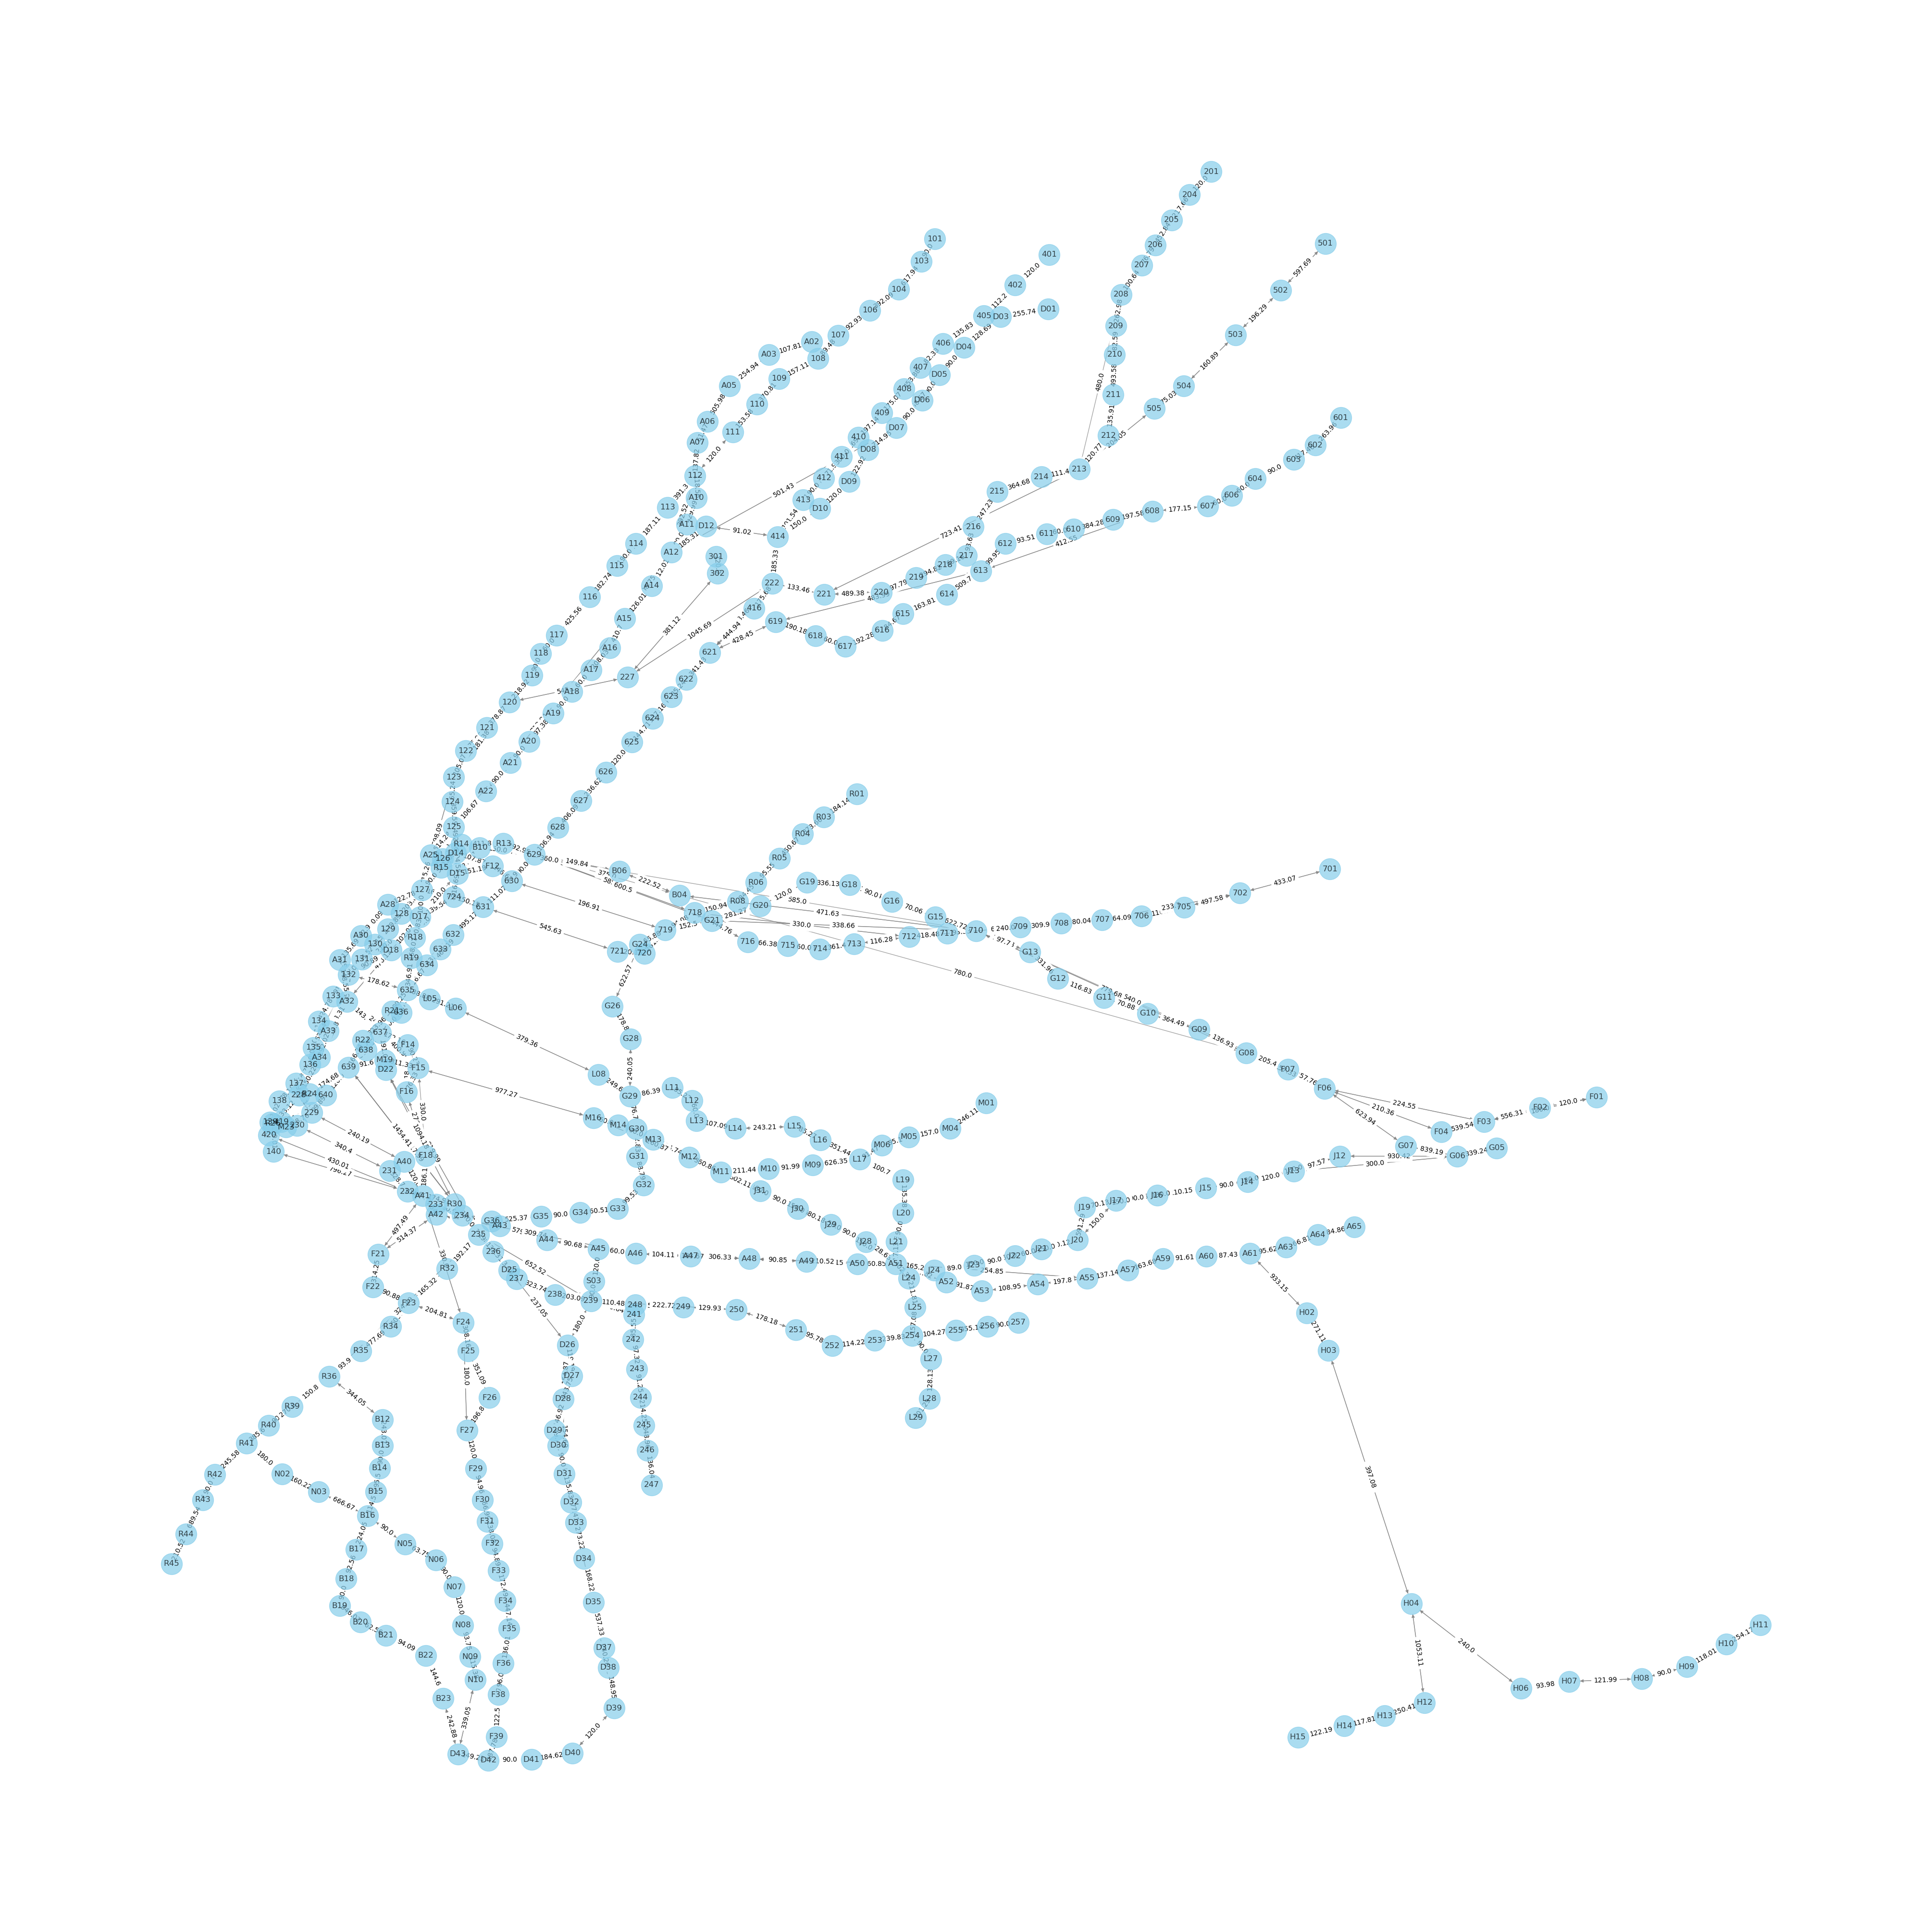

,station_id,stop_lat,stop_lon,btwn,clse,pgrk,egvt
0,101,40.889248,-73.898583,0.000000,0.000190,0.002280,2.459624e-15
1,103,40.884667,-73.900870,0.004866,0.000193,0.004518,6.498672e-14
2,104,40.878856,-73.904834,0.009709,0.000219,0.002978,2.498287e-13
3,106,40.874561,-73.909831,0.014527,0.000239,0.001771,1.500306e-12
4,107,40.869444,-73.915279,0.019322,0.000244,0.002098,3.816468e-11
...,...,...,...,...,...,...,...
407,R42,40.634967,-74.023377,0.014527,0.000295,0.002038,1.756986e-03
408,R43,40.629742,-74.025510,0.009709,0.000249,0.004211,4.872332e-04
409,R44,40.622687,-74.028398,0.004866,0.000236,0.003584,4.445220e-05
410,R45,40.616622,-74.030876,0.000000,0.000230,0.000815,2.242197e-06


In [12]:
# Process NetworkX analysis
%pip install networkx --upgrade
%pip install pandas --upgrade
%pip install scipy --upgrade
from utils.generate_networkx_analysis import run_networkx_analysis

# Reads from ./results/queried_dates/
# Also reads from ./results/queried_dates/{SEARCH_START_DATE}-{SEARCH_END_DATE}-aggregated_nodes_edges.csv
# NetworkX analysis is run directly on the data provided by the start-end queried csv file
run_networkx_analysis()

In [13]:
# Aggregation of all nodes and edges between a time period
# uses results from above process_trips_to_daily_graph.py in results/daily_files/*
from utils.generate_daily_sum import aggregate_daily_total_stops
aggregate_daily_total_stops(2020, 1, 1,
                            2023, 5, 31)